# Chapter 6 - Exercise 4: Weather
## Cho dữ liệu weather.csv
## Sử dụng thuật toán Decision Tree để dự đoán nhiệt độ (Temperature_c) dựa trên các thông tin được cung cấp:
1. Đọc dữ liệu và gán cho biến data. Xem thông tin data: shape, type, head(), tail(), info. Tiền xử
lý dữ liệu (nếu cần)
2. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 80:20
3. Thực hiện Decision Tree với X_train, y_train
4. Dự đoán y từ X_test => so sánh với y_test
5. Xem kết quả => Nhận xét model
6. Ghi model nếu model phù hợp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
weather = pd.read_csv('Data/weather.csv')
weather

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [4]:
weather.isnull().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
Description             0
dtype: int64

In [6]:
x = weather.drop('Temperature_c', axis = 1)
y = weather['Temperature_c']

## <span style='color:yellow'> Build Decision Tree Regressor

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

Accuracy score of Tree_Classifier on train set: 0.8751663655681309
Accuracy score of Tree_Classifier on test set: 0.8797285295601412



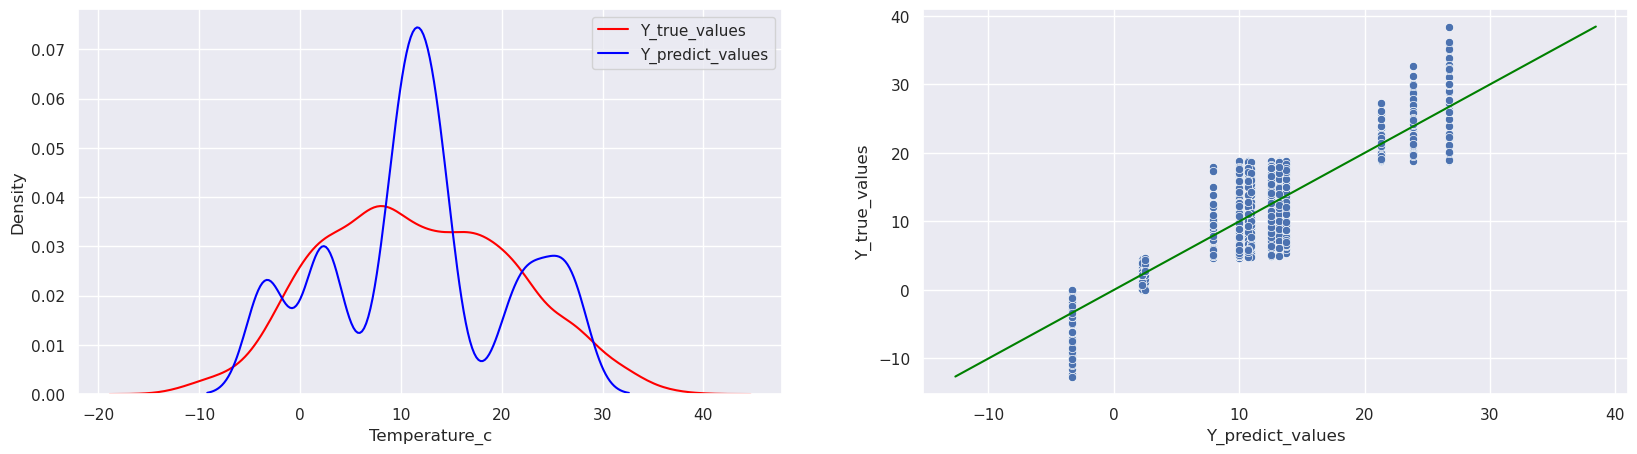

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline

treeR_pipe = Pipeline([
    ('OneHotEncoder', make_column_transformer( (OneHotEncoder(handle_unknown='ignore', drop='first'), ['Description']), remainder='passthrough') ),
    ('Tree_Regressor', DecisionTreeRegressor(criterion='squared_error', min_samples_split = 1000))
])

treeR_pipe.fit(x_train, y_train)

y_test_pred = treeR_pipe.predict(x_test)


print(f'Accuracy score of Tree_Classifier on train set: {treeR_pipe.score(x_train, y_train)}')
print(f'Accuracy score of Tree_Classifier on test set: {treeR_pipe.score(x_test, y_test)}')
print()

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sbn.kdeplot(x = y_test, color = 'red', label = 'Y_true_values')
sbn.kdeplot(x = y_test_pred, color = 'blue', label = 'Y_predict_values')
plt.legend()

plt.subplot(1,2,2)
sbn.lineplot(x = [y_test.min(), y_test.max()], y = [y_test.min(), y_test.max()], color='green')
sbn.scatterplot(x = y_test_pred, y = y_test)
plt.xlabel('Y_predict_values')
plt.ylabel('Y_true_values')

plt.show()

## <span style='color:yellow'> Visualize Decision Tree Regressor

In [14]:
features = treeR_pipe.named_steps['OneHotEncoder'].get_feature_names_out()

features_cleaned = [feat.replace('onehotencoder__', '').replace('remainder__', '') for feat in features]
print(features_cleaned)

del features

['Description_Normal', 'Description_Warm', 'Humidity', 'Wind_Speed_kmh', 'Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Rain']


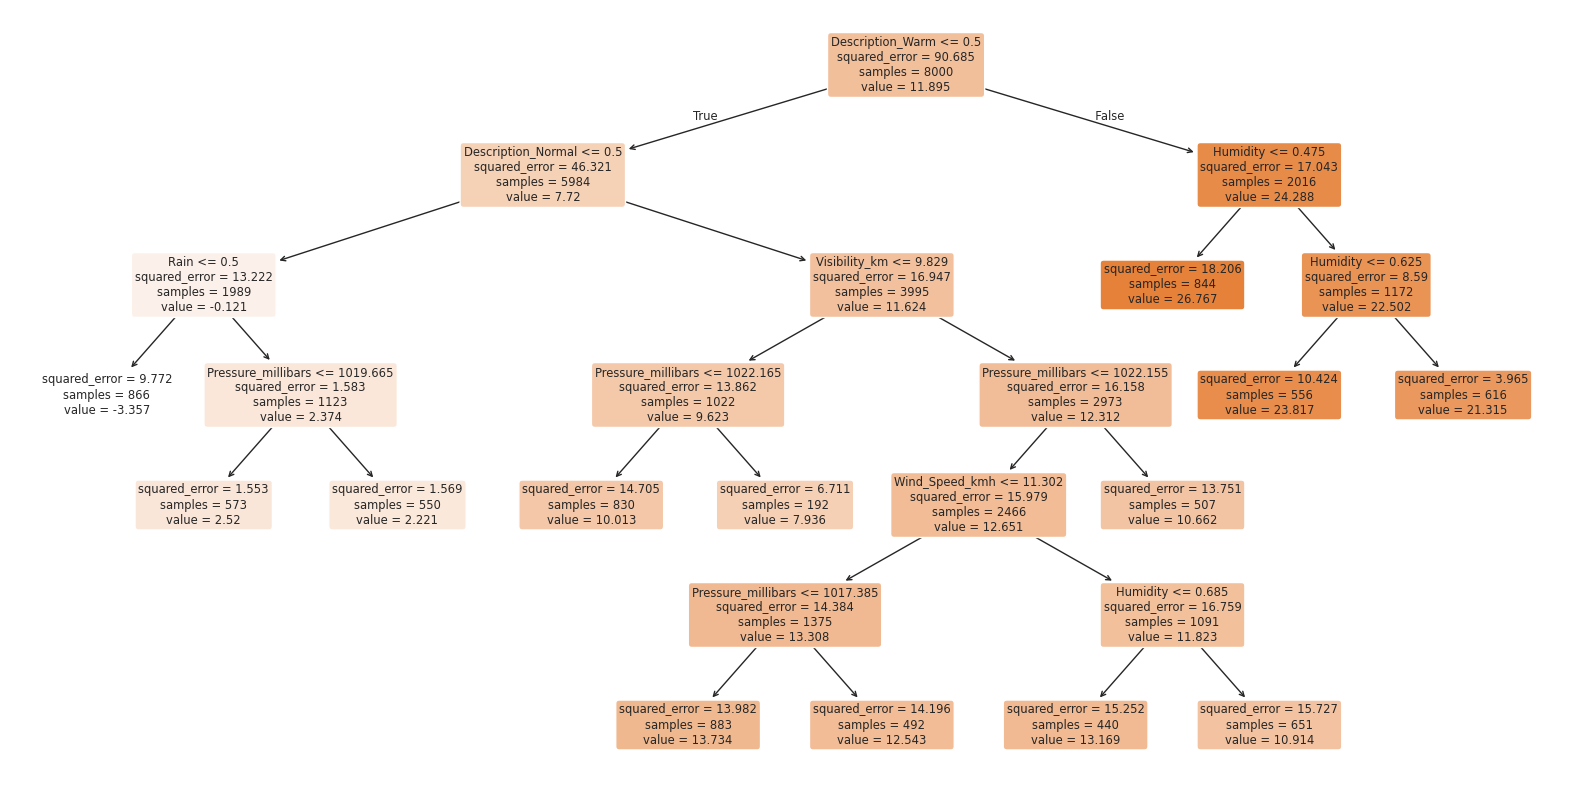

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(treeR_pipe.named_steps['Tree_Regressor'],
         filled = True,
         feature_names = features_cleaned,
         class_names = ['e','p'],
         rounded=True,                
          proportion=False)

plt.show()